In [11]:
#importing various libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
#from mplfinance import candlestick_ohlc
!pip install mplfinance
from mplfinance.original_flavor import candlestick_ohlc


You should consider upgrading via the 'c:\users\aakanksha\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [12]:
#load the data
df = pd.read_csv("bitcoin_dataset.csv")
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [13]:
df.tail(7)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
2913,2018-02-14 00:00:00,9334.633333,16865550.0,1.574337e+11,9.151655e+08,156762.090638,1.015835,0.0,1097.301676,10.225000,...,1.553881,109.366318,450367.0,196417.0,299471605.0,192621.0,140594.0,1.557017e+06,148097.503082,1.382436e+09
2914,2018-02-15 00:00:00,9977.154000,16867187.5,1.682865e+11,1.282426e+09,156901.460878,1.063895,0.0,1512.847328,8.483333,...,1.317213,85.662879,475029.0,198183.0,299669788.0,194351.0,139075.0,1.418774e+06,129180.361091,1.288852e+09
2915,2018-02-16 00:00:00,10127.161667,16869150.0,1.708366e+11,8.665020e+08,157056.833478,0.989634,0.0,1195.783439,6.616667,...,1.893340,109.005818,422415.0,187738.0,299857526.0,180685.0,126413.0,1.102896e+06,106729.749001,1.080869e+09
2916,2018-02-17 00:00:00,10841.991667,16871012.5,1.829154e+11,9.735543e+08,157201.813038,0.973017,0.0,1166.369128,7.933333,...,2.362525,119.228205,401860.0,173789.0,300031315.0,167847.0,122775.0,1.473900e+06,80893.896177,8.770509e+08
2917,2018-02-18 00:00:00,10503.298333,16873037.5,1.772225e+11,1.377347e+09,157359.401239,0.972767,0.0,984.537037,6.966667,...,2.598018,136.289229,378869.0,159495.0,300190810.0,153951.0,113528.0,1.639024e+06,79660.081975,8.366936e+08
2918,2018-02-19 00:00:00,11110.965000,16875062.5,1.874982e+11,1.020589e+09,157522.467859,1.006584,0.0,1156.586420,8.416667,...,2.006207,123.102480,436341.0,187367.0,300378177.0,181922.0,135051.0,1.789526e+06,103474.270242,1.149699e+09
2919,2018-02-20 00:00:00,11390.391667,16876825.0,1.922336e+11,1.258473e+09,157664.996336,1.010840,0.0,1407.482270,8.466667,...,1.391617,104.157082,455116.0,198455.0,300576632.0,191891.0,139951.0,1.268018e+06,130404.455959,1.485358e+09


Creating a new column which will store the difference between miner_revenue & transaction_fes


In [14]:
df.drop(['btc_blocks_size','btc_avg_block_size','btc_n_orphaned_blocks','btc_n_transactions_per_block','btc_median_confirmation_time','btc_cost_per_transaction_percent','btc_cost_per_transaction','btc_n_transactions','btc_n_transactions_excluding_popular','btc_n_transactions_excluding_chains_longer_than_100','btc_estimated_transaction_volume_usd'], 1, inplace=True)

In [15]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_n_unique_addresses,btc_n_transactions_total,btc_output_volume,btc_estimated_transaction_volume
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.000032,2.527738,0.0,0.0,252.0,42613.0,12600.0,50.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.000036,3.781179,0.0,0.0,195.0,42809.0,14800.0,5300.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.000028,3.781179,0.0,0.0,150.0,42959.0,8100.0,700.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.000032,3.781179,0.0,0.0,176.0,43135.0,29349.0,13162.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.000033,3.781179,0.0,0.0,176.0,43311.0,9101.0,450.0


In [16]:
df.drop(['btc_hash_rate','btc_market_price','btc_estimated_transaction_volume','btc_output_volume'], 1, inplace=True)

In [17]:
df.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_n_unique_addresses,btc_n_transactions_total
0,2010-02-23 00:00:00,2110700.0,0.0,0.0,2.527738,0.0,0.0,252.0,42613.0
1,2010-02-24 00:00:00,2120200.0,0.0,0.0,3.781179,0.0,0.0,195.0,42809.0
2,2010-02-25 00:00:00,2127600.0,0.0,0.0,3.781179,0.0,0.0,150.0,42959.0
3,2010-02-26 00:00:00,2136100.0,0.0,0.0,3.781179,0.0,0.0,176.0,43135.0
4,2010-02-27 00:00:00,2144750.0,0.0,0.0,3.781179,0.0,0.0,176.0,43311.0


In [18]:
df.drop(['btc_n_transactions_total'], 1, inplace=True)

In [19]:
df.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_n_unique_addresses
0,2010-02-23 00:00:00,2110700.0,0.0,0.0,2.527738,0.0,0.0,252.0
1,2010-02-24 00:00:00,2120200.0,0.0,0.0,3.781179,0.0,0.0,195.0
2,2010-02-25 00:00:00,2127600.0,0.0,0.0,3.781179,0.0,0.0,150.0
3,2010-02-26 00:00:00,2136100.0,0.0,0.0,3.781179,0.0,0.0,176.0
4,2010-02-27 00:00:00,2144750.0,0.0,0.0,3.781179,0.0,0.0,176.0


<AxesSubplot:ylabel='btc_market_cap'>

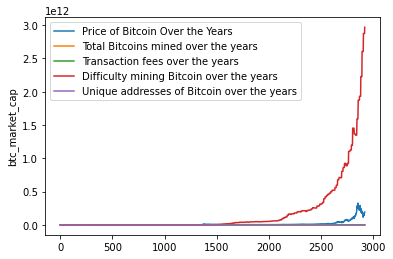

In [26]:
sns.lineplot(data=df.btc_market_cap, label = "Price of Bitcoin Over the Years")
sns.lineplot(data=df.btc_total_bitcoins, label = "Total Bitcoins mined over the years")
sns.lineplot(data=df.btc_transaction_fees, label = "Transaction fees over the years")
sns.lineplot(data=df.btc_difficulty , label = "Difficulty mining Bitcoin over the years") 
sns.lineplot(data=df.btc_n_unique_addresses , label = "Unique addresses of Bitcoin over the years")

<AxesSubplot:ylabel='btc_rewards'>

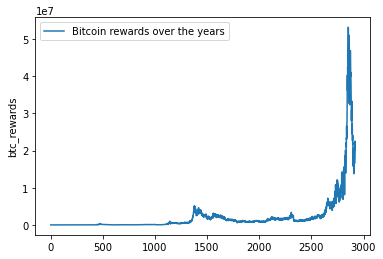

In [28]:
df['btc_rewards'] = df['btc_miners_revenue'] - df['btc_transaction_fees']
sns.lineplot(data=df.btc_rewards , label = "Bitcoin rewards over the years")